## Stroke Risk Assessment Using Machine Learning
Strokes are a leading cause of death and disability globally, affecting millions of people each year. Even with all the progress we've made in medicine, accurately predicting the risk of stroke remains a challenge to date. This dataset is used to develop a predictive model that accurately assesses the risk of stroke in individuals based on various features like gender, age,bmi, heart disease, and others. Each row in the data provides relevant information about the patient. 


In [5]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

## Data Collection

In [7]:
#Loading the dataset
file_path = '/Users/shubray/Desktop/healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(file_path)


In [8]:
# Summary of the dataset
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Display the first few rows of the DataFrame
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
# Observe the distribution of the data
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# Range of values by column
stroke_data.aggregate(['min','max'])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
min,67,Female,0.08,0,0,No,Govt_job,Rural,55.12,10.3,Unknown,0
max,72940,Other,82.00,1,1,Yes,children,Urban,271.74,97.6,smokes,1


In [12]:
#Accessing the column names
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
stroke_data.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Patient')

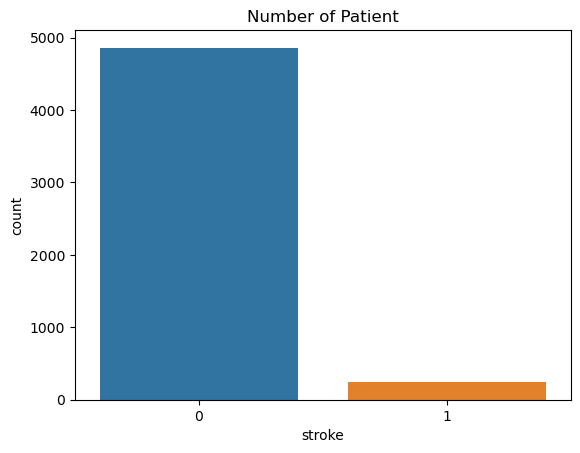

In [14]:
# Show Number of Patient by Stroke

sns.countplot(data=stroke_data , x='stroke')
plt.title('Number of Patient')

## Data Cleaning

In [16]:
# Finding missing values
stroke_data.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [17]:
# Summarizing the missing data count for each column
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
# Missing data percentage
print(stroke_data.isnull().sum()/stroke_data.count()*100)

id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64


In [19]:
# Count the number of unique values in each column
unique_value_counts = stroke_data.nunique()
unique_value_counts

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [20]:
# Percentage of unique values
stroke_data.nunique()/stroke_data.size*100

id                   8.333333
gender               0.004892
age                  0.169602
hypertension         0.003262
heart_disease        0.003262
ever_married         0.003262
work_type            0.008154
Residence_type       0.003262
avg_glucose_level    6.488911
bmi                  0.681670
smoking_status       0.006523
stroke               0.003262
dtype: float64

In [22]:
# Numerical variables
num_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('Numerical Variables Column: ',num_features)

Number of numerical variables:  7
Numerical Variables Column:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [24]:
# Categorical Variables
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
Categorical variables column name: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


## Handling missing values

In [ ]:
stroke_data.isnull().sum()

In [50]:
stroke_data["bmi"]=stroke_data["bmi"].fillna(stroke_data["bmi"].mean())

In [52]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

This project is all about understanding and predicting the risk of stroke, a condition that affects millions of people each year. We started with a dataset of over 5,000 individuals. The dataset includes both numerical and categorical features such as age, gender, BMI, hypertension, heart disease, and lifestyle factors like smoking status. Firstly, the data was explored to understand its structure and identify missing values. We noticed some gaps, particularly in the BMI values, with BMI having 4.1% missing data. The missing values were handled by imputing the mean BMI.. The next step is to analyze and visualize the cleaned data. 